In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = "chest_xray/train/"
TEST_DIR =  "chest_xray/test/"

# Model : CNN without Batch Normalization and Dropout

In [3]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.
C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\Anaconda3\envs\tensor

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
 #Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1000)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
4000/4000 [==============================] - 8356s 2s/step - loss: 0.1493 - accuracy: 0.9419 - val_loss: 0.3663 - val_accuracy: 0.9038
Epoch 2/10
4000/4000 [==============================] - 6226s 2s/step - loss: 0.1017 - accuracy: 0.9614 - val_loss: 0.3514 - val_accuracy: 0.9183
Epoch 3/10
4000/4000 [==============================] - 3039s 760ms/step - loss: 0.0776 - accuracy: 0.9706 - val_loss: 0.1211 - val_accuracy: 0.9135
Epoch 4/10
4000/4000 [==============================] - 3051s 763ms/step - loss: 0.0595 - accuracy: 0.9778 - val_loss: 0.0162 - val_accuracy: 0.9183
Epoch 5/10
4000/4000 [==============================] - 2985s 746ms/step - loss: 0.0498 - accuracy: 0.9815 - val_loss: 0.4609 - val_accuracy: 0.8926
Epoch 6/10
4000/4000 [==============================] - 3017s 754ms/step - loss: 0.0404 - accuracy: 0.9847 - val_loss: 0.0190 - val_accuracy: 0.9038
Epoch 7/10
4000/4000 [=======

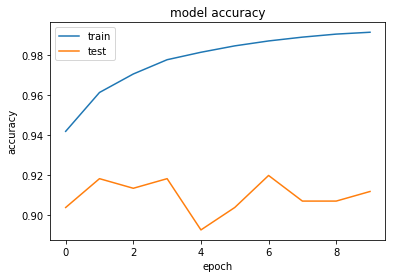

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


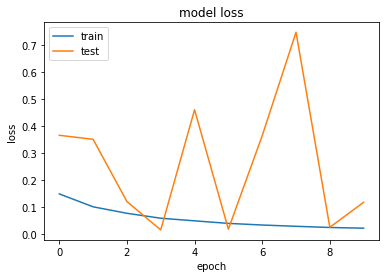

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
